In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm
import statsmodels.api as sm2
import EWS_functions as ews

In [2]:
# Sea Surface Temperature indices
time_sst = np.arange(1870, 2023)
amoc2 = np.loadtxt('data/amoc_indices/SST_sg_gm.txt')
amoc3 = np.loadtxt('data/amoc_indices/SST_sg_gm_amo.txt')
amoc4 = np.loadtxt('data/amoc_indices/SST_dipole.txt')
amoc5 = np.loadtxt('data/amoc_indices/SST_sg_nh.txt')

# Salinity indices
time_sal = np.arange(1900, 2019)
amoc6 = np.load('data/amoc_indices/S_nn1.npy')
amoc7 = np.load('data/amoc_indices/S_n.npy')
amoc8 = np.load('data/amoc_indices/S_s.npy')
amoc9 = np.load('data/amoc_indices/S_nn2.npy')

In [3]:
w = 70
bound = 35
tt_samples = 100_000

def plot_runmean(ax, x, y, color, label):
    ax.plot(x, y, color=color, label=label)
    ax.plot(x, ews.runmean(y, w), color=color, linewidth=3)
    
def plot_var(ax, x, y, color, label):
    var = ews.runstd(y, w)[bound:-bound]**2
    p0, p1 = np.polyfit(x[bound:-bound], var, 1)
    var_fit = p0 * x + p1
    pv = ews.kendall_tau_test(var, tt_samples, p0)
    if pv < 1e-3:
        pv_label = "P < $10^{-3}$"
    else:
        pv_label = f"P = {pv:.3f}"
    ax.plot(x[bound:-bound], var , color=color, label=label)
    ax.plot(x, var_fit, color=color, linestyle='--', label=pv_label)
    
def plot_ac(ax, x, y, color, label):
    ac = ews.runac(y, w)[bound: -bound]
    p0, p1 = np.polyfit(x[bound:-bound], ac, 1)
    ac_fit = p0 * x + p1
    pv = ews.kendall_tau_test(ac, tt_samples, p0)
    if pv < 1e-3:
        pv_label = "P < $10^{-3}$"
    else:
        pv_label = f"P = {pv:.3f}"
    ax.plot(x[bound:-bound], ac , color=color, label=label)
    ax.plot(x, ac_fit, color=color, linestyle='--', label=pv_label)
    
def plot_a_ar1(ax, x, y, color, label):
    a = ews.run_fit_a_ar1(y, w)[bound:-bound]
    p0, p1 = np.polyfit(x[bound:-bound], a, 1)
    a_fit = p0 * x + p1
    pv = ews.kendall_tau_test(a, tt_samples, p0)
    if pv < 1e-3:
        pv_label = "P < $10^{-3}$"
    else:
        pv_label = f"P = {pv:.3f}"
    ax.plot(x[bound:-bound], a , color=color, label=label)
    ax.plot(x, a_fit, color=color, linestyle='--', label=pv_label)


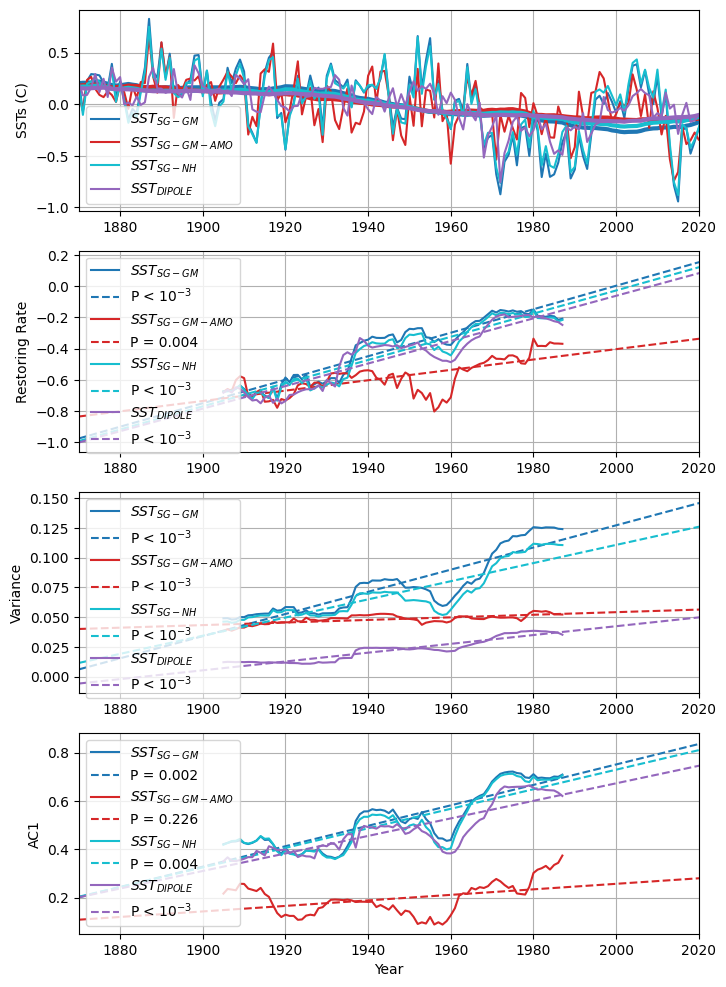

In [12]:
fig = plt.figure(figsize = (8, 12))
ax = fig.add_subplot(411)
plot_runmean(ax, time_sst, amoc2, 'tab:blue', '$SST_{SG-GM}$')
plot_runmean(ax, time_sst, amoc3, 'tab:red', '$SST_{SG-GM-AMO}$')
plot_runmean(ax, time_sst, amoc5, 'tab:cyan', '$SST_{SG-NH}$')
plot_runmean(ax, time_sst, amoc4, 'tab:purple', '$SST_{DIPOLE}$')
ax.set_xlim(1870, 2020)
ax.set_ylabel('SSTs (C)')
plt.legend()
plt.grid()

ax = fig.add_subplot(412)
plot_a_ar1(ax, time_sst, amoc2, 'tab:blue', '$SST_{SG-GM}$')
plot_a_ar1(ax, time_sst, amoc3, 'tab:red', '$SST_{SG-GM-AMO}$')
plot_a_ar1(ax, time_sst, amoc5, 'tab:cyan', '$SST_{SG-NH}$')
plot_a_ar1(ax, time_sst, amoc4, 'tab:purple', '$SST_{DIPOLE}$')
ax.set_xlim(1870, 2020)
ax.set_ylabel('Restoring Rate')
plt.legend()
plt.grid()

ax = fig.add_subplot(413)
plot_var(ax, time_sst, amoc2, 'tab:blue', '$SST_{SG-GM}$')
plot_var(ax, time_sst, amoc3, 'tab:red', '$SST_{SG-GM-AMO}$')
plot_var(ax, time_sst, amoc5, 'tab:cyan', '$SST_{SG-NH}$')
plot_var(ax, time_sst, amoc4, 'tab:purple', '$SST_{DIPOLE}$')
ax.set_xlim(1870, 2020)
ax.set_ylabel('Variance')
plt.legend()
plt.grid()

ax = fig.add_subplot(414)
plot_ac(ax, time_sst, amoc2, 'tab:blue', '$SST_{SG-GM}$')
plot_ac(ax, time_sst, amoc3, 'tab:red', '$SST_{SG-GM-AMO}$')
plot_ac(ax, time_sst, amoc5, 'tab:cyan', '$SST_{SG-NH}$')
plot_ac(ax, time_sst, amoc4, 'tab:purple', '$SST_{DIPOLE}$')
ax.set_xlim(1870, 2020)
ax.set_ylabel('AC1')
ax.set_xlabel('Year')
plt.legend()
plt.grid()



In [13]:
fig.savefig("plots/amoc_indices_ews_SST.pdf")

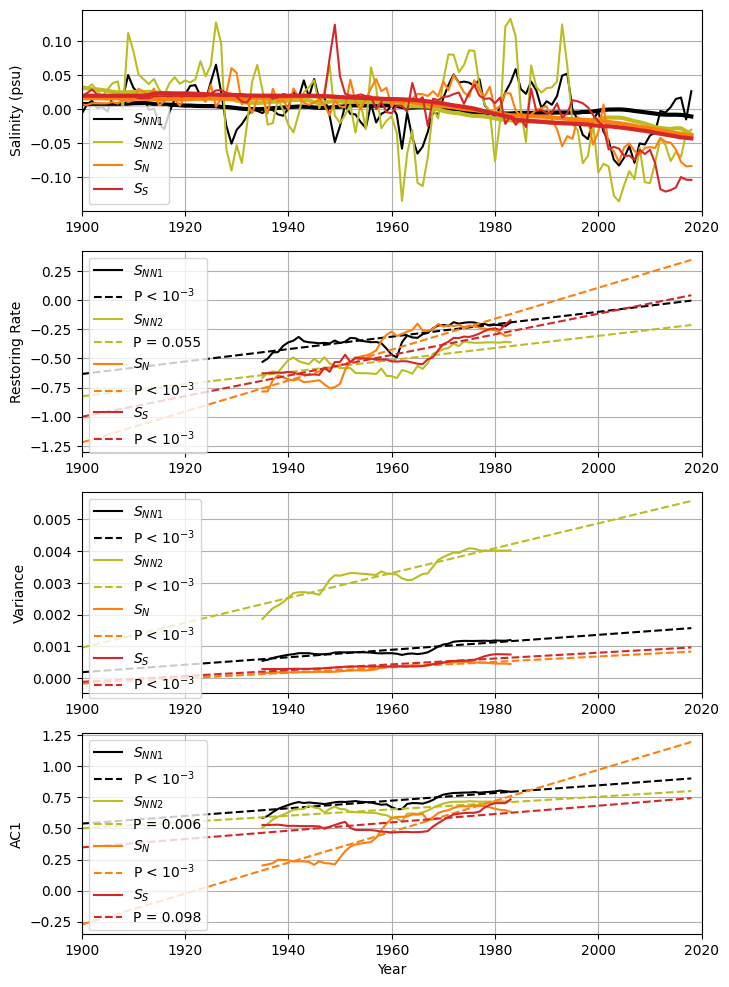

In [16]:
fig = plt.figure(figsize = (8, 12))

ax = fig.add_subplot(411)
plot_runmean(ax, time_sal, amoc6, 'k', '$S_{NN1}$')
plot_runmean(ax, time_sal, amoc9, 'tab:olive', '$S_{NN2}$')
plot_runmean(ax, time_sal, amoc7, 'tab:orange', '$S_{N}$')
plot_runmean(ax, time_sal, amoc8, 'tab:red', '$S_{S}$')
ax.set_xlim(1900, 2020)
ax.set_ylabel('Salinity (psu)')
plt.legend()
plt.grid()

ax = fig.add_subplot(412)
plot_a_ar1(ax, time_sal, amoc6, 'k', '$S_{NN1}$')
plot_a_ar1(ax, time_sal, amoc9, 'tab:olive', '$S_{NN2}$')
plot_a_ar1(ax, time_sal, amoc7, 'tab:orange', '$S_{N}$')
plot_a_ar1(ax, time_sal, amoc8, 'tab:red', '$S_{S}$')
ax.set_xlim(1900, 2020)
ax.set_ylabel('Restoring Rate')
plt.legend(loc='upper left')
plt.grid()

ax = fig.add_subplot(413)
plot_var(ax, time_sal, amoc6, 'k', '$S_{NN1}$')
plot_var(ax, time_sal, amoc9, 'tab:olive', '$S_{NN2}$')
plot_var(ax, time_sal, amoc7, 'tab:orange', '$S_{N}$')
plot_var(ax, time_sal, amoc8, 'tab:red', '$S_{S}$')
ax.set_xlim(1900, 2020)
ax.set_ylabel('Variance')
plt.legend(loc='upper left')
plt.grid()

ax = fig.add_subplot(414)
plot_ac(ax, time_sal, amoc6, 'k', '$S_{NN1}$')
plot_ac(ax, time_sal, amoc9, 'tab:olive', '$S_{NN2}$')
plot_ac(ax, time_sal, amoc7, 'tab:orange', '$S_{N}$')
plot_ac(ax, time_sal, amoc8, 'tab:red', '$S_{S}$')
ax.set_xlim(1900, 2020)
ax.set_ylabel('AC1')
ax.set_xlabel('Year')
plt.legend(loc='upper left')
plt.grid()

In [18]:
fig.savefig("plots/amoc_indices_ews_Sal.pdf")